<a href="https://colab.research.google.com/github/yoondaeng/ICE4104-AI-Applications/blob/main/HW02_12201953_%EC%A0%95%EC%9C%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW02: Multi-Layer Perceptron and Gradient Descent

Following codes are training MLP for [dataset](https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/) using Keras.

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics

from tensorflow import keras
import requests

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [ ]:
dataset_URL = "https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/"

In [ ]:
url = dataset_URL + "x_test.csv"
c = pd.read_csv(url, on_bad_lines='skip')

In [ ]:
# Load training data
train_input = pd.read_csv(dataset_URL + 'x_train.csv', skiprows=1, delimiter=',').to_numpy()
train_target = pd.read_csv(dataset_URL + 'y_train.csv', skiprows=1, delimiter=',').to_numpy()

# Load test data
test_input = pd.read_csv(dataset_URL + 'x_test.csv', skiprows=1, delimiter=',').to_numpy()
test_target = pd.read_csv(dataset_URL + 'y_test.csv', skiprows=1, delimiter=',').to_numpy()

assert train_input.shape[0] == train_target.shape[0]
assert test_input.shape[0] == test_target.shape[0]

train_target = train_target.flatten()
test_target = test_target.flatten()

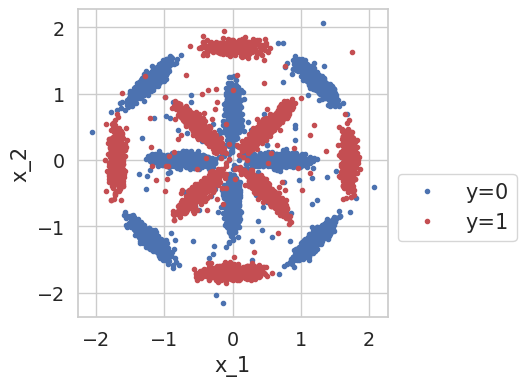

In [ ]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel('x_1'); plt.ylabel('x_2');

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                48        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
history = model.fit(train_input, train_target,
          validation_data = (test_input, test_target),
          epochs=15, batch_size = 32, verbose = 0)

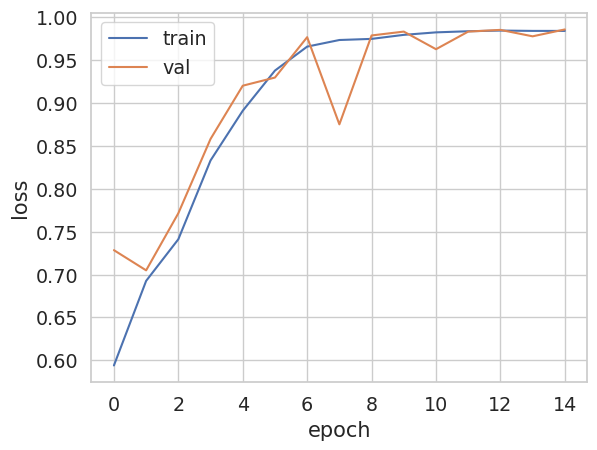

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Visualize the output

In [ ]:
def visualize_network(model, train_input, train_target):
  # -1에서 1 사이의 균일한 값 생성
  num_points = 100  # 원하는 점의 개수
  x = np.linspace(-2, 2, num_points)
  y = np.linspace(-2, 2, num_points)

  # 2D 그리드 생성
  xx, yy = np.meshgrid(x, y)

  # 2D 그리드를 하나의 numpy array로 변환
  data = np.vstack([xx.ravel(), yy.ravel()]).T

  res = model.predict(data)

  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=res[:, 0], cmap='coolwarm', alpha=0.7)
  plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
  plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
  plt.colorbar(label='Result Value')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Scatter plot with color representing result value')
  plt.show()

313/313 [==============================] - 0s 1ms/step


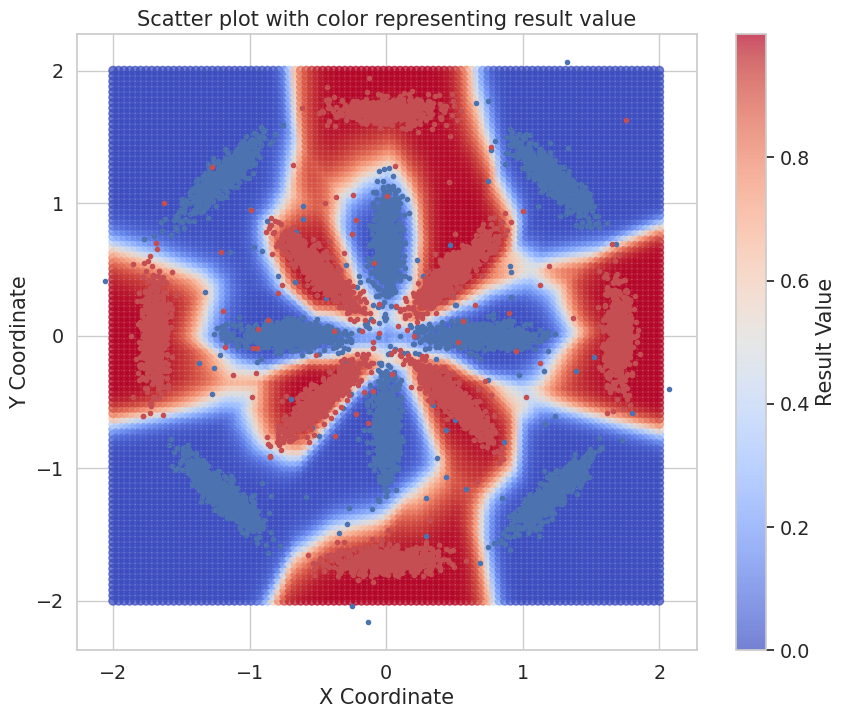

In [ ]:
visualize_network(model, train_input, train_target)

## Task 1: Deep Neural Network

Make a network with only a single layer, train it, and visualize using `visualize_network`.

How does it look? Explain why.

How can we change the structure of the network?


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


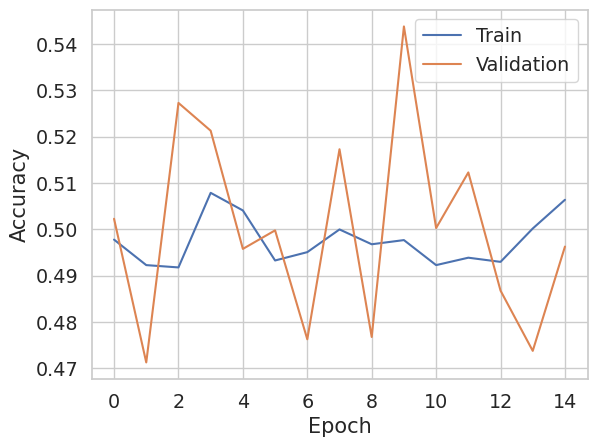

313/313 [==============================] - 0s 1ms/step


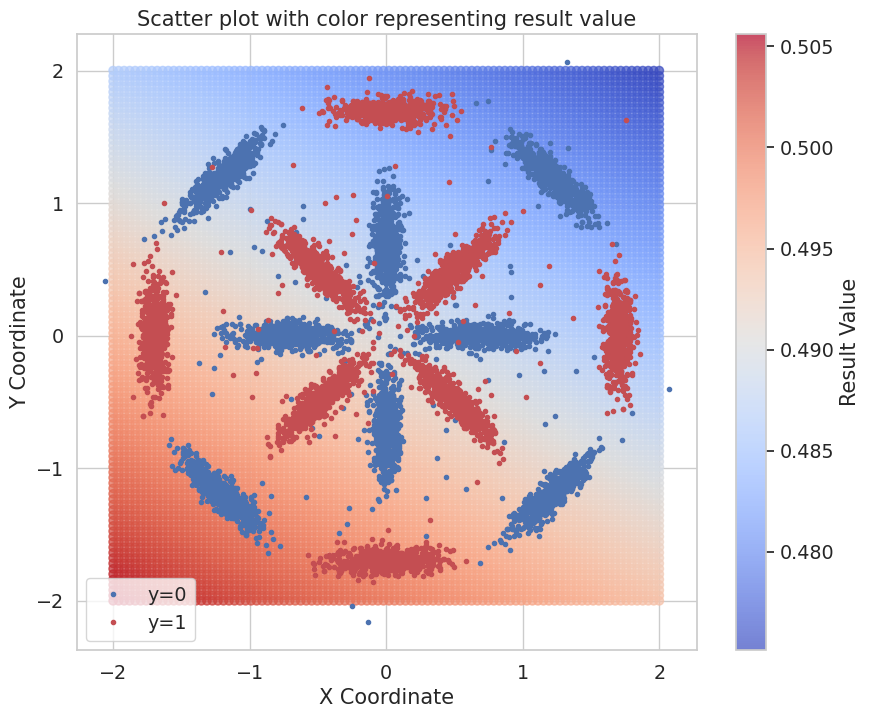

In [ ]:
# 단일 레이어 신경망 정의
single_layer_model = keras.Sequential()
single_layer_model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

single_layer_model.summary()

# 모델 컴파일
single_layer_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.SGD(learning_rate=0.05))

# 모델 학습
history = single_layer_model.fit(train_input, train_target,
                                 validation_data=(test_input, test_target),
                                 epochs=15, batch_size=32, verbose=0)

# 학습 결과 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# 네트워크 시각화 함수
def visualize_network(model, train_input, train_target):
    num_points = 100
    x = np.linspace(-2, 2, num_points)
    y = np.linspace(-2, 2, num_points)
    xx, yy = np.meshgrid(x, y)
    data = np.vstack([xx.ravel(), yy.ravel()]).T
    res = model.predict(data)
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], c=res[:, 0], cmap='coolwarm', alpha=0.7)
    plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0')
    plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1')
    plt.colorbar(label='Result Value')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter plot with color representing result value')
    plt.legend()
    plt.show()

# 단일 레이어 신경망 시각화
visualize_network(single_layer_model, train_input, train_target)

## Answer 1
---
### 단일 레이어 신경망 정의
- `keras.Sequential()`을 사용하여 신경망 모델을 초기화

- Dense 레이어 하나만 추가
- 활성화 함수로 sigmoid를 사용
- 입력 크기는 2로 설정 `(input_shape=(2,))`

### 모델 컴파일
- 손실 함수 `binary_crossentropy`

- 옵티마이저로 `SGD(확률적 경사 하강법)` 사용
- 학습률은 `0.05`로 설정

### 모델 학습
- fit 함수를 사용하여 모델 학습

- 학습 데이터를 32개의 배치로 나누어 15번의 에포크 동안 학습하였다.

- 검증 데이터로 test_input과 test_target 사용

### 학습 결과 시각화
- `Single layer`의 경우, `Multi-Layer`보다 학습률과 벨리데이션이 안좋게 나온 것을 확인할 수 있었다.

- `Single layer` 신경망은 선형 모델이므로, 데이터의 선형 경계를 학습할 수 있다.

    - 데이터가 선형적으로 분리 가능한 경우에 적합

- 비선형 데이터에 더 나은 성능을 얻으려면 `Multi-Layer`를 사용하는 방법이 있다.

### 단일 레이어와 다층 신경망의 차이점
- `단일 레이어 신경망`
    - 입력 레이어와 출력 레이어만으로 구성

    - 선형 활성화 함수만 사용되므로 비선형 데이터에 대한 학습 능력이 제한

    - 선형 분류 문제에 적합 -> 단순한 패턴 학습 가능
        - 비선형 데이터에 대해서는 한계 존재

- `다층 신경망`
    - 여러 개의 은닉 레이어를 추가하여 구성
    
    - 비선형 활성화 함수(ReLU, 시그모이드)를 사용하여 각 레이어에서 비선형성을 가짐
    
    - 여러 개의 은닉 레이어를 통해 복잡한 패턴을 학습 가능
        - 비선형 데이터에 적합
    - 복잡한 데이터셋에서는 다층 신경망이 성능이 더 우수
    - 비선형 관계를 더 잘 학습할 수 있다.

## Task 2: Forward Pass Method

Implement the forward pass of the exact same network.

| Layer (type)  | Output Shape | Param # |
|---------------|---------------|---------|
| dense (Dense) | (None, 16)    | 48      |
| dense_1 (Dense)| (None, 32)   | 544     |
| dense_2 (Dense)| (None, 16)   | 528     |
| dense_3 (Dense)| (None, 1)    | 17      |


## Task 3: Training the Neural Network

Implement the training of **the same** network as in the Keras example.

Basic settings are given as follows, but feel free to modify:

* Loss function: binary cross-entropy
* Optimizer: SGD with learning rate 0.05
* Epochs: 15
* Batch size: 32

### Important Notes:

* Implement the training of the network by finishing the skeleton code below.
* **Do not** use ML libraries such as Keras or PyTorch.
* Only **NumPy functions** are allowed.
* Make comments detailed. They will be considered as part of the report.
* Never cheat by using AI tools like Gemini or ChatGPT to do your homework.


In [ ]:
import numpy as np

class DenseLayer:
    def __init__(self, input_dim, output_dim, activation=None):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
        self.bias = np.zeros((1, output_dim))
        self.activation = activation

    def forward(self, inputs):
        self.inputs = inputs
        self.z = np.dot(inputs, self.weights) + self.bias
        self.a = self._apply_activation(self.z)
        return self.a

    def _apply_activation(self, z):
        if self.activation == 'relu':
            return np.maximum(0, z)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        return z

    def _apply_activation_derivative(self, z):
        if self.activation == 'relu':
            return np.where(z > 0, 1, 0)
        elif self.activation == 'sigmoid':
            sig = 1 / (1 + np.exp(-z))
            return sig * (1 - sig)
        return np.ones_like(z)

In [ ]:
class flowerNet():
    def __init__(self):
        self.layers = [
            DenseLayer(input_dim=2, output_dim=16, activation='relu'),
            DenseLayer(input_dim=16, output_dim=32, activation='relu'),
            DenseLayer(input_dim=32, output_dim=16, activation='relu'),
            DenseLayer(input_dim=16, output_dim=1, activation='sigmoid')
        ]

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, y_true, y_pred, learning_rate):
        m = y_true.shape[0]
        dL_dy = -(y_true / y_pred) + (1 - y_true) / (1 - y_pred)

        for layer in reversed(self.layers):
            m = layer.inputs.shape[0]

            if layer == self.layers[-1]:
                dL_dz = y_pred - y_true.reshape(-1, 1)
            else:
                dL_dz = dL_dy * layer._apply_activation_derivative(layer.z)

            dL_dw = np.dot(layer.inputs.T, dL_dz) / m
            dL_db = np.sum(dL_dz, axis=0, keepdims=True) / m

            if layer != self.layers[0]:
                dL_dy = np.dot(dL_dz, layer.weights.T)

            layer.weights -= learning_rate * dL_dw
            layer.bias -= learning_rate * dL_db

    def train(self, x, y_target, epochs=15, batch_size=32, learning_rate=0.05):
        for epoch in range(epochs):
            permutation = np.random.permutation(x.shape[0])
            x_shuffled = x[permutation]
            y_shuffled = y_target[permutation]
            for i in range(0, x.shape[0], batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                y_pred = self.predict(x_batch)
                self.backward(y_batch, y_pred, learning_rate)
            print(f"Epoch {epoch+1}/{epochs} completed")

In [ ]:
# 데이터 로드
dataset_URL = "https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/"

In [ ]:
import pandas as pd
url = dataset_URL + "x_test.csv"
c = pd.read_csv(url, on_bad_lines='skip')

# Load training data
train_input = pd.read_csv(dataset_URL + 'x_train.csv', skiprows=1, delimiter=',').to_numpy()
train_target = pd.read_csv(dataset_URL + 'y_train.csv', skiprows=1, delimiter=',').to_numpy()

# Load test data
test_input = pd.read_csv(dataset_URL + 'x_test.csv', skiprows=1, delimiter=',').to_numpy()
test_target = pd.read_csv(dataset_URL + 'y_test.csv', skiprows=1, delimiter=',').to_numpy()

assert train_input.shape[0] == train_target.shape[0]
assert test_input.shape[0] == test_target.shape[0]

train_target = train_target.flatten()
test_target = test_target.flatten()

In [ ]:
# define model
myModel = flowerNet()

In [ ]:
# accuracy before training
y = myModel.predict(train_input)
print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.49994999499949994
Validation accuracy: 0.49974987493746875


In [ ]:
# training example
myModel.train(train_input, train_target, epochs=15, batch_size=32, learning_rate=0.05)

Epoch 1/15 completed
Epoch 2/15 completed
Epoch 3/15 completed
Epoch 4/15 completed
Epoch 5/15 completed
Epoch 6/15 completed
Epoch 7/15 completed
Epoch 8/15 completed
Epoch 9/15 completed
Epoch 10/15 completed
Epoch 11/15 completed
Epoch 12/15 completed
Epoch 13/15 completed
Epoch 14/15 completed
Epoch 15/15 completed


In [ ]:
# accuracy after training
y = myModel.predict(train_input)
print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.9878987898789879
Validation accuracy: 0.9834917458729364


## A. Explanation of codes.

### `DenseLayer class`
---
- 입력 차원, 출력 차원 및 활성화 함수로 초기화

- `def __init__`
    - 가중치와 바이어스를 초기화
        - 가중치는 `He Initialization` 이용
        - ReLU와 같은 활성화 함수와 함께 사용할 때 더 잘 작동하는 경향, ReLU를 활성함수로 사용하므로 따라서, He 초기화를 사용하였다.
        - `self.bias = np.zeros((1, output_dim))` 바이어스 0으로 초기화

    - activation 매개변수는 사용할 활성화 함수 지정(ReLU 또는 Sigmoid)

- `def forward(self, inputs)`
    - 입력, 가중치, 바이어스를 선형 결합하여 z를 계산

    - 활성화 함수를 z에 적용하여 출력 a를 얻는다.

- `def _apply_activation(self, z)`
    - 입력 z에 지정된 활성화 함수를 적용하는 함수

- `def _apply_activation_derivative(self, z)`
    - 활성화 함수의 도함수를 계산하여 역전파에 사용


### `flowerNet class`
---
- 여러 DenseLayer 인스턴스를 포함하고 있으며, predict 메서드는 네트워크 전체를 통해 데이터를 전달한다.
- backward는 손실에 대한 각 층의 기울기를 계산하고 가중치와 편향을 업데이트

- `def __init__(self)`
    - 지정된 레이어로 네트워크를 초기화하는 함수

    - 첫 세 레이어는 ReLU 활성화 함수를 사용
    - 마지막 레이어는 이진 분류를 위해 Sigmoid 함수를 사용한다.

- `def predict(self, x)`
    - 모든 레이어를 통해 순방향 전파를 수행하여 예측

- `def backward(self, y_true, y_pred, learning_rate)`
    - 손실의 예측에 대한 기울기를 계산

    - 각 레이어를 역방향으로 전파
    
    - 가중치와 바이어스를 learning_rate=`0.05`를 사용하여 업데이트

- `def train(self, x, y_target, epochs=15, batch_size=32, learning_rate=0.05)`

    - epochs=15, batch_size=32, learning_rate=0.05를 사용하여 모델 학습

    - 각 에포크의 시작에서 데이터를 섞는다.

    - 데이터를 배치로 나누고 각 배치에 대해 순방향 및 역방향 전파를 수행

## `결론`
---
### `트레이닝 전 accuracy`
- Training accuracy: 0.49994999499949994
- Validation accuracy: 0.49974987493746875

### `트레이닝 후 accuracy`
- Training accuracy: 0.9878987898789879
- Validation accuracy: 0.9834917458729364

트레이닝 전에 비해 트레이닝 후 Training, Validation accuracy가 향상된 것을 확인할 수 있다.


### Acknowledgement

Data set from
https://www.cs.tufts.edu/comp/135/2023f/hw3.html



